In [215]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [216]:
DATASET = "census" #wine
PLOT_FILE = "../plots/plot_"+DATASET+".csv"

# Plot data

In [335]:
def bar_plot_under_attack(df, metric, train_budget):

    fig, ax = plt.subplots(1, 1, figsize=(5,9))
    
    models = ["Baseline [GBDT]", 
              "Adversarial-Boosting [b={}]".format(train_budget), 
              "Non-Interferent [b={}]".format(train_budget)]

    data = df[df["Model"].isin(models)].filter(regex=("Model|Budget|"+metric))
    
    palette={'Baseline [GBDT]': '#cf3721',
                             "Adversarial-Boosting [b={}]".format(train_budget): '#31a9b8', #'#f5be41',
                             "Non-Interferent [b={}]".format(train_budget): '#258039'
                            }

    _ = sns.barplot(x="Budget", y=metric, hue="Model", data=data, ax=ax)
    _ = ax.set_xlabel("budget", fontsize=16, labelpad=12)
    ylabel = metric
    if metric == "F1":
        ylabel = "$F_1\ score$"
    _ = ax.set_ylabel(ylabel, fontsize=16, labelpad=6)
    start, end = ax.get_ylim()
    _ = ax.yaxis.set_ticks(np.arange(start, end, 0.1))
    _ = ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
    _ = ax.legend(loc='lower right', borderaxespad=0.5, fontsize=14)

    
#     handles, labels = ax[i].get_legend_handles_labels()
#     fig.legend(handles, labels, loc='best', borderaxespad=0.5, fontsize=14) #bbox_to_anchor=(1.05, 1), loc=2

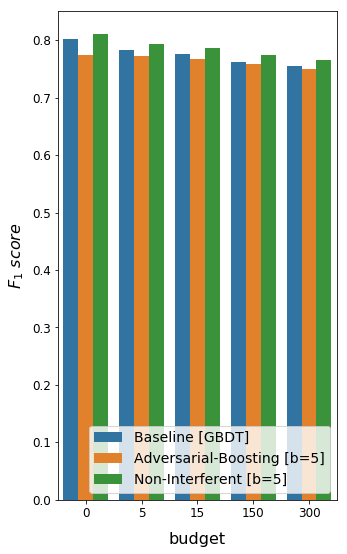

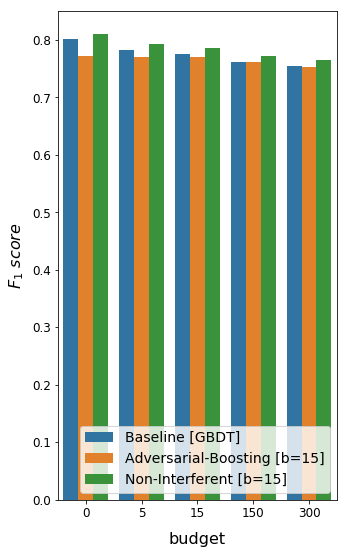

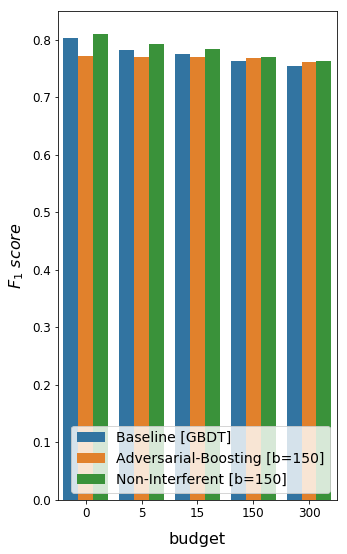

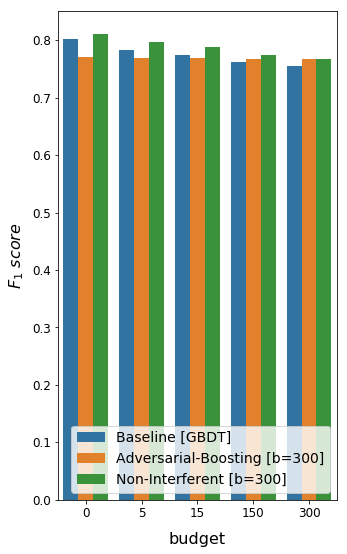

In [336]:
for i, b in enumerate([5, 15, 150, 300]):
    bar_plot_under_attack(eval_df, "F1", b)

In [354]:
def specificity_sensitivity(df, train_budget, att_budget):

    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    #plt.title("Training budget = {} / Testing budget = {}".format(train_budget, att_budget), fontsize=16, pad=12)
    
    models = ["Baseline [GBDT]", 
              "Adversarial-Boosting [b={}]".format(train_budget), 
              "Non-Interferent [b={}]".format(train_budget)]
    

    data = df[df["Model"].isin(models)].filter(regex=("Model|Budget|Specificity|Sensitivity"))

    _ = data[data.Budget == att_budget].plot(x="Budget", y=["Specificity", "Sensitivity"], kind="bar", ax=ax, color=['#31a9b8', '#cf3721'])
    _ = ax.set_xticklabels(["Baseline [GBDT]", 
                            "Adversarial-Boosting", "Non-Interferent",
                           ], rotation=45
                          )
    _ = ax.set_xlabel("Models", fontsize=16, labelpad=12)
    _ = ax.set_xlabel("")
    ylabel = "Specificity/Sensitivity"
    _ = ax.set_ylabel(ylabel, fontsize=16, labelpad=6)
    _ = ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
    _ = ax.legend(loc='lower right', borderaxespad=0.5, fontsize=14)

In [355]:
import itertools
from operator import itemgetter

b = [0,5,15,150,300]
c = list(itertools.product(b, b))
pairs = sorted(c, key=itemgetter(0,1))
pairs[0:5] = []

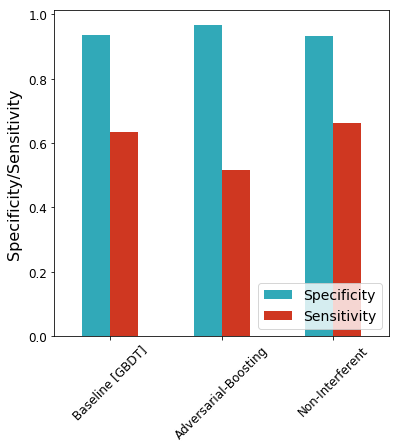

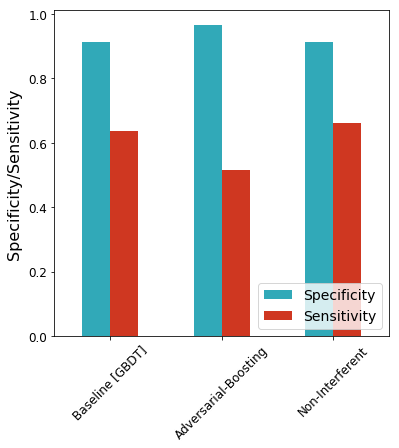

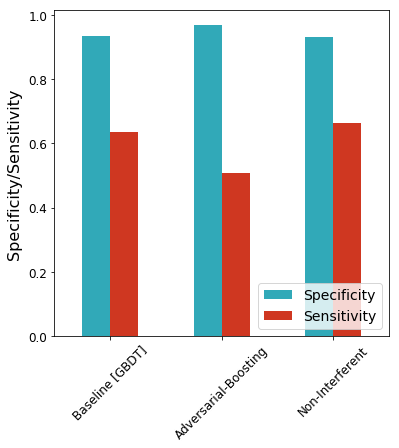

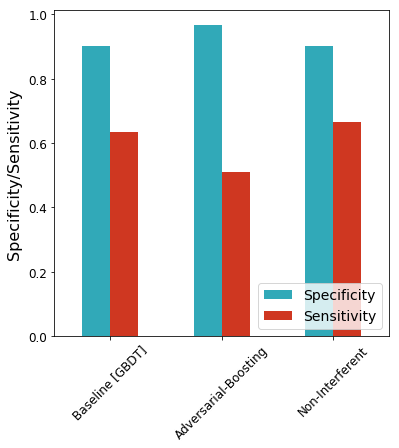

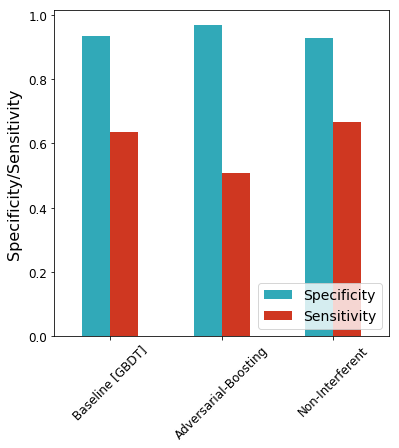

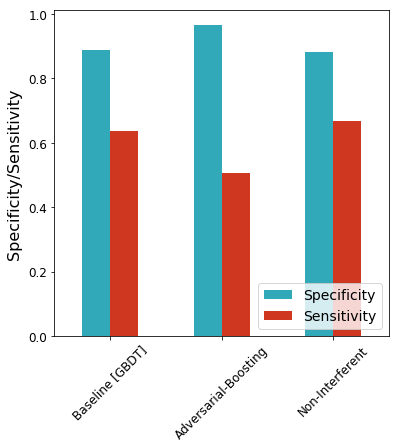

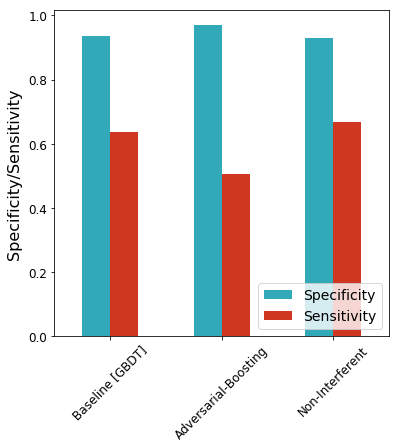

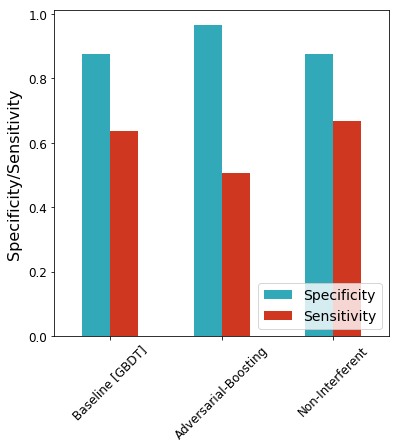

In [356]:
for tb, ab in pairs:
    if tb == ab or ab == 0:
        specificity_sensitivity(eval_df, tb, ab)

# Figure 1

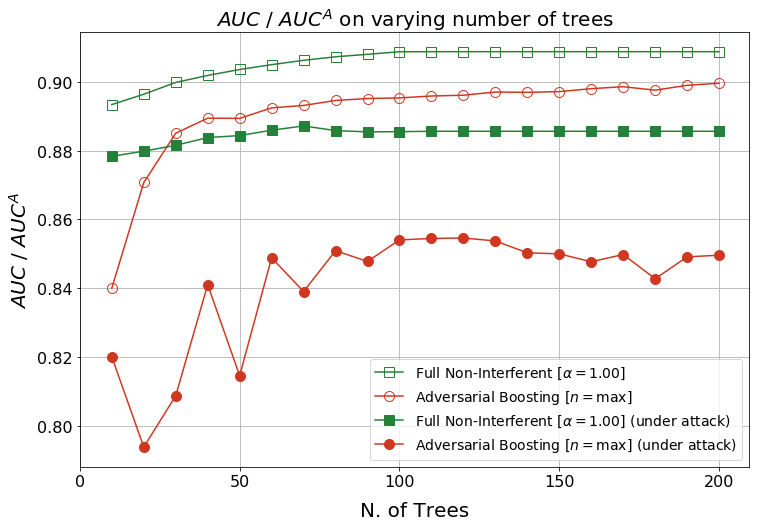

In [21]:
# Figure
plt.figure(figsize=(12,8))

# sns.pointplot(x="N. of Trees", y="ROC AUC Under Max Attack", hue="Model", 
#                   data=eval_df, ax=ax, palette="OrRd", 
#                   markers=['s', '*', '*', '*', '*', '*', '*', 'o'], 
#                   linestyles=['-', '-', '-', '-', '-', '-', '-', '-']
#                  )

################## ROC AUC ##################

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Full-Non-Interferent"], 
         eval_df["ROC AUC"][eval_df['Model']=="Full-Non-Interferent"], 
         color='#258039', marker='s', ms=10, mfc='None', label=r"Full Non-Interferent [$\alpha=1.00$]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          color='#31a9b8', marker='x', ms=10, mfc='None', label="Weighted-Non-Interferent [alpha=0.50]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          color='#f5be41', marker='D', ms=10, mfc='None', label="Weighted-Non-Interferent [alpha=0.10]")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         eval_df["ROC AUC"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         color='#cf3721', marker='o', ms=10,  mfc='None', label=r"Adversarial Boosting [$n = \max$]")

################## ROC AUC Under Max Attack ##################

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Full-Non-Interferent"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Full-Non-Interferent"], 
         color='#258039', marker='s',  ms=10,  label=r"Full Non-Interferent [$\alpha=1.00$] (under attack)")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          color='#31a9b8', marker='x', ms=10,  label="Weighted-Non-Interferent [alpha=0.50] (under attack)")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          color='#f5be41', marker='D',  ms=10,  label="Weighted-Non-Interferent [alpha=0.10] (under attack)")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         color='#cf3721', marker='o',  ms=10, label=r"Adversarial Boosting [$n = \max$] (under attack)")


#plt.xlim([0,210])
plt.xticks(range(0,210,50))

plt.legend(loc="best", borderaxespad=0.5, fontsize=14) #bbox_to_anchor=(1.05, 1), loc=2
plt.title("$AUC$ / $AUC^A$ on varying number of trees", fontsize=20)
plt.xlabel("N. of Trees", fontsize=20, labelpad=12)
plt.ylabel("$AUC$ / $AUC^A$", fontsize=20, labelpad=6)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid()
plt.savefig(ATTACKER+"_roc_auc_trees.pdf")

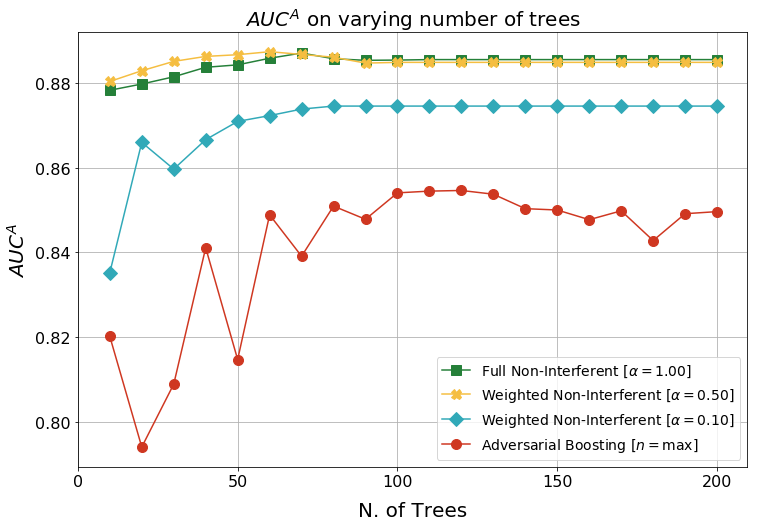

In [24]:
# Figure
plt.figure(figsize=(12,8))

# sns.pointplot(x="N. of Trees", y="ROC AUC Under Max Attack", hue="Model", 
#                   data=eval_df, ax=ax, palette="OrRd", 
#                   markers=['s', '*', '*', '*', '*', '*', '*', 'o'], 
#                   linestyles=['-', '-', '-', '-', '-', '-', '-', '-']
#                  )

################## ROC AUC ##################

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Full-Non-Interferent"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Full-Non-Interferent"], 
#          color='#258039', marker='s', ms=10, mfc='None', label=r"Full Non-Interferent [$\alpha=1.00$]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          color='#f5be41', marker='X', ms=10, mfc='None', label=r"Weighted Non-Interferent [$\alpha=0.50$]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          color='#31a9b8', marker='D', ms=10, mfc='None', label=r"Weighted Non-Interferent [$\alpha=0.10$]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
#          color='#cf3721', marker='o', ms=10,  mfc='None', label=r"Adversarial Boosting [$n = \max$]")

################## ROC AUC Under Max Attack ##################

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Full-Non-Interferent"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Full-Non-Interferent"], 
         color='#258039', marker='s',  ms=10,  label=r"Full Non-Interferent [$\alpha=1.00$]")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
         color='#f5be41', marker='X', ms=10,  label=r"Weighted Non-Interferent [$\alpha=0.50$]")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
         color='#31a9b8', marker='D',  ms=10,  label=r"Weighted Non-Interferent [$\alpha=0.10$]")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         color='#cf3721', marker='o',  ms=10, label=r"Adversarial Boosting [$n = \max$]")


#plt.xlim([0,210])
plt.xticks(range(0,210,50))

plt.legend(loc="best", borderaxespad=0.5, fontsize=14) #bbox_to_anchor=(1.05, 1), loc=2
plt.title("$AUC^A$ on varying number of trees", fontsize=20)
plt.xlabel("N. of Trees", fontsize=20, labelpad=12)
plt.ylabel("$AUC^A$", fontsize=20, labelpad=6)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid()
plt.savefig(ATTACKER+"_roc_auc_trees_alpha.pdf")
#plt.savefig("unattacked_roc_auc_trees_alpha.pdf")

# Table 1

In [ ]:
def clean_df (eval_df):

    eval_df.rename(columns={
    "Roc Auc": "ROC AUC", 
    "Roc Auc Uma": "ROC AUC Under Max Attack",
    "Log Loss Uma": "Log Loss Under Max Attack",
    "Binary Err Rate Uma": "Binary Err Rate Under Max Attack"
    }, inplace=True)
    
    eval_df = eval_df[(eval_df['Model']=="Standard") |
                      (eval_df['Model']=="Baseline [p=1.0; n=max]") |
                      (eval_df['Model']=="Baseline [p=1.0; n=1]") |
                      (eval_df['Model']=="SVM [C=0.1]") |
                      (eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]") |
                      (eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]") |
                      (eval_df['Model']=="Full-Non-Interferent")
                      ]

    eval_df = eval_df[(eval_df['N. of Trees']==0) | (eval_df['Model'] == 'SVM [C=0.1]')]

    eval_df["e-ROC"] = eval_df["ROC AUC"] - eval_df["ROC AUC Under Max Attack"] 
    eval_df["e-LogLoss"] = - eval_df["Log Loss"] + eval_df["Log Loss Under Max Attack"] 
    
    return eval_df

weak_df = clean_df( pd.read_csv("../plots/weak.csv", sep=",") )
display(weak_df)

strong_df = clean_df( pd.read_csv("../plots/strong.csv", sep=",") )
display(strong_df)

In [ ]:
weak_df['Model'].unique()

In [ ]:
row_map = {"Standard":"GBDT", 
           "Baseline [p=1.0; n=1]":"Adv. Boosting [n=1]", 
           "Baseline [p=1.0; n=max]":"Adv. Boosting [n=max]", 
           "SVM [C=0.1]": "SVM",
           "Weighted-Non-Interferent [alpha=0.10]": "Weighted-Non-Interferent [alpha=0.10]",
           "Weighted-Non-Interferent [alpha=0.50]": "Weighted-Non-Interferent [alpha=0.50]",
           "Full-Non-Interferent": "Full-Non-Interferent [alpha=1.00]"
          }


for row in list(row_map.keys()):
    print (row_map[row], end="\t")
    for col in ["Log Loss", "Log Loss Under Max Attack", "e-LogLoss"]:
        print ( " & %.3f" % weak_df[weak_df['Model']==row][col].values[0], end="") 
    for col in ["Log Loss", "Log Loss Under Max Attack", "e-LogLoss"]:
        print ( " & %.3f" % strong_df[strong_df['Model']==row][col].values[0], end="") 
    print (" \\\\")

for row in list(row_map.keys()):
    print (row_map[row], end="\t")
    for col in ["ROC AUC", "ROC AUC Under Max Attack", "e-ROC"]:
        print ( " & %.3f" % weak_df[weak_df['Model']==row][col].values[0], end="") 
    for col in ["ROC AUC", "ROC AUC Under Max Attack", "e-ROC"]:
        print ( " & %.3f" % strong_df[strong_df['Model']==row][col].values[0], end="") 
    print (" \\\\")


# Load evaluation results

In [190]:
eval_df = pd.read_csv(PLOT_FILE, sep=",")
eval_df.rename(columns={
    "Roc Auc": "ROC AUC", 
    "Roc Auc Uma": "ROC AUC",
    "Log Loss Uma": "Log Loss",
    "Binary Err Rate Uma": "Binary Err Rate",
    "Specificity Uma": "Specificity",
    "Sensitivity Uma": "Sensitivity",
    "F1 Uma": "F1"
}, inplace=True)

In [191]:
eval_df

,Model,Budget,Log Loss,Binary Err Rate,Specificity,Sensitivity,F1,ROC AUC,Log Loss,Binary Err Rate,Specificity,Sensitivity,F1,ROC AUC
0,Baseline [GBDT],0,0.300081,0.137866,0.935852,0.635092,0.802092,0.916728,NaN,NaN,NaN,NaN,NaN,NaN
1,Adversarial-Boosting [b=5],0,0.317257,0.144168,0.966022,0.516464,0.773609,0.913199,NaN,NaN,NaN,NaN,NaN,NaN
2,Adversarial-Boosting [b=15],0,0.318171,0.144610,0.967926,0.508796,0.771476,0.913467,NaN,NaN,NaN,NaN,NaN,NaN
3,Adversarial-Boosting [b=150],0,0.318685,0.144831,0.968219,0.506991,0.770835,0.913253,NaN,NaN,NaN,NaN,NaN,NaN
4,Adversarial-Boosting [b=300],0,0.318377,0.144500,0.969098,0.505638,0.770922,0.913692,NaN,NaN,NaN,NaN,NaN,NaN
5,Non-Interferent [b=5],0,0.292658,0.133444,0.933216,0.661254,0.810933,0.921880,NaN,NaN,NaN,NaN,NaN,NaN
6,Non-Interferent [b=15],0,0.292938,0.134218,0.931166,0.664411,0.810512,0.921711,NaN,NaN,NaN,NaN,NaN,NaN
7,Non-Interferent [b=150],0,0.293678,0.134881,0.929701,0.666216,0.810023,0.921295,NaN,NaN,NaN,NaN,NaN,NaN
8,Non-Interferent [b=300],0,0.292364,0.134107,0.930141,0.668020,0.811144,0.921781,NaN,NaN,NaN,NaN,NaN,NaN
9,Baseline [GBDT],5,NaN,NaN,NaN,NaN,NaN,NaN,0.330521,0.155556,0.912419,0.635092,0.782680,0.897666


In [192]:
eval_df_unatt = eval_df[eval_df.Budget == 0]

In [193]:
eval_df_unatt = eval_df_unatt.dropna(axis=1)

In [194]:
eval_df_unatt

,Model,Budget,Log Loss,Binary Err Rate,Specificity,Sensitivity,F1,ROC AUC
0,Baseline [GBDT],0,0.300081,0.137866,0.935852,0.635092,0.802092,0.916728
1,Adversarial-Boosting [b=5],0,0.317257,0.144168,0.966022,0.516464,0.773609,0.913199
2,Adversarial-Boosting [b=15],0,0.318171,0.144610,0.967926,0.508796,0.771476,0.913467
3,Adversarial-Boosting [b=150],0,0.318685,0.144831,0.968219,0.506991,0.770835,0.913253
4,Adversarial-Boosting [b=300],0,0.318377,0.144500,0.969098,0.505638,0.770922,0.913692
5,Non-Interferent [b=5],0,0.292658,0.133444,0.933216,0.661254,0.810933,0.921880
6,Non-Interferent [b=15],0,0.292938,0.134218,0.931166,0.664411,0.810512,0.921711
7,Non-Interferent [b=150],0,0.293678,0.134881,0.929701,0.666216,0.810023,0.921295
8,Non-Interferent [b=300],0,0.292364,0.134107,0.930141,0.668020,0.811144,0.921781


In [195]:
eval_df_att = eval_df[eval_df.Budget > 0]

In [196]:
eval_df_att = eval_df_att.dropna(axis=1)

In [197]:
eval_df_att

,Model,Budget,Log Loss,Binary Err Rate,Specificity,Sensitivity,F1,ROC AUC
9,Baseline [GBDT],5,0.330521,0.155556,0.912419,0.635092,0.782680,0.897666
10,Adversarial-Boosting [b=5],5,0.320084,0.145163,0.964704,0.516464,0.772474,0.910535
11,Adversarial-Boosting [b=15],5,0.320650,0.145716,0.966462,0.508796,0.770215,0.911083
12,Adversarial-Boosting [b=150],5,0.321078,0.145716,0.967047,0.506991,0.769826,0.910905
13,Adversarial-Boosting [b=300],5,0.320714,0.145495,0.967780,0.505638,0.769785,0.911422
14,Non-Interferent [b=5],5,0.320903,0.148701,0.913005,0.661254,0.794078,0.905616
15,Non-Interferent [b=15],5,0.323576,0.150138,0.910076,0.664411,0.792987,0.904714
16,Non-Interferent [b=150],5,0.324565,0.150580,0.908905,0.666216,0.792774,0.904114
17,Non-Interferent [b=300],5,0.321063,0.147374,0.912566,0.668020,0.796505,0.905720
18,Baseline [GBDT],15,0.345171,0.162742,0.902900,0.635092,0.775033,0.888038


In [198]:
eval_df = pd.concat([eval_df_unatt, eval_df_att], axis=0, sort=False)

In [199]:
eval_df

,Model,Budget,Log Loss,Binary Err Rate,Specificity,Sensitivity,F1,ROC AUC
0,Baseline [GBDT],0,0.300081,0.137866,0.935852,0.635092,0.802092,0.916728
1,Adversarial-Boosting [b=5],0,0.317257,0.144168,0.966022,0.516464,0.773609,0.913199
2,Adversarial-Boosting [b=15],0,0.318171,0.144610,0.967926,0.508796,0.771476,0.913467
3,Adversarial-Boosting [b=150],0,0.318685,0.144831,0.968219,0.506991,0.770835,0.913253
4,Adversarial-Boosting [b=300],0,0.318377,0.144500,0.969098,0.505638,0.770922,0.913692
5,Non-Interferent [b=5],0,0.292658,0.133444,0.933216,0.661254,0.810933,0.921880
6,Non-Interferent [b=15],0,0.292938,0.134218,0.931166,0.664411,0.810512,0.921711
7,Non-Interferent [b=150],0,0.293678,0.134881,0.929701,0.666216,0.810023,0.921295
8,Non-Interferent [b=300],0,0.292364,0.134107,0.930141,0.668020,0.811144,0.921781
9,Baseline [GBDT],5,0.330521,0.155556,0.912419,0.635092,0.782680,0.897666
